In [1]:
# IMPORTANT!!!
# Desar la pràctica posant els NIUs dels membres del grup
# És imprescindible que el worksheet es pugui avaluar completament (Cell->Run All) sense que es produeixi cap error de sintaxi. 
# Cal lliurar el worksheet ABANS de finalitzar la vostra sessió de pràctiques.
# No s'avaluaran worksheets que no compleixin els requisits anteriors.

NIU_ESTUDIANT_1 = ""
NOM_ESTUDIANT_1 = ""

NIU_ESTUDIANT_2 = ""
NOM_ESTUDIANT_2 = ""

In [2]:
# EXERCISE 1a: Implement divisibility rule for 9
#
# Function UAB_divisible_by_9.
# * Parameter n: Integer to check (>= 0)
# * Returns: boolean, true if n is divisible by 9, false otherwise.
#

def isNatural(n):
    return n >= 0

def UAB_divisible_by_9(n):
    if isNatural(n):
        while n > 9:
            n = sum(map(int, str(n)))
    return n == 9 or n == 0

In [3]:
# EXERCISE 1b: Implement divisibility rule for 11
#
# Function UAB_divisible_by 11.
# * Parameter n: Integer to check (>= 0)
# * Returns: boolean, true if n is divisible by 11, false otherwise.
#

def UAB_divisible_by_11(n):
    if isNatural(n):
        while n >= 11:
            s = str(n)
            upper = map(int, s[::2] )
            lower = map(int, s[1::2])
            res = abs(sum(upper) - sum(lower))
            n = res
        return n == 0
    return False

In [4]:
# EXERCISE 2a: Compute gcd between two integers using Euclid's Algorithm
#
# Function UAB_gcd_with_euclides.
# * Parameter m: Integer to check (>= 0)
# * Parameter n: Integer to check (>= 0)
# * Returns: gcd between the integers m and n.
#

def UAB_gcd_with_euclides(m, n):
     #### IMPLEMENTATION GOES HERE ####
    result = None
    if isNatural(m) and isNatural(n):
        if n < m:
            n, m = m, n
        r = m % n
        while r:
            m = n
            n = r
            r = m % n
        result = n
    return result
##################################

In [5]:
# EXERCISE 2b: Estimate the probability that two random numbers are coprime
#
# Function UAB_exp_coprime_prob.
# * Parameter N: Upper bound on the integers to evaluate size
# * Parameter M: Sample size
# * Returns: float, experimental probability that two random numbers are
# coprime when performing M experiments with random numbers <= N
#

def UAB_exp_coprime_prob(N, M):
    #### IMPLEMENTATION GOES HERE ####
    n = 0
    for _ in range(M):
        a, b = randint(0, N), randint(1, N)
        n   += UAB_gcd_with_euclides(a, b) == 1
    return n/M;
    ##################################

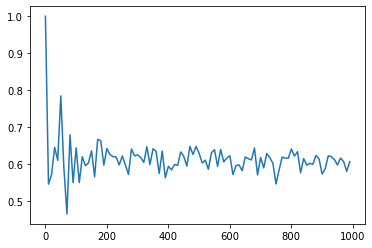

In [6]:
# EXERCISE 2c:
import matplotlib.pyplot as plt
#### IMPLEMENTATION GOES HERE ####
x = [i for i in range(1, 1000, 10)]
y = [ UAB_exp_coprime_prob(191, i) for i in range(1, 1000, 10)]
plt.plot(x, y)
plt.show()
##################################

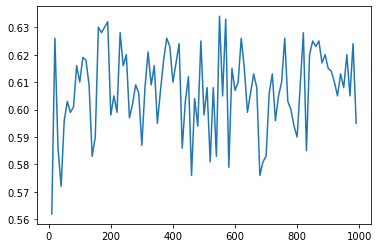

In [7]:
x = [i for i in range(10, 1000, 10)]
y = [ UAB_exp_coprime_prob(i, 1000) for i in range(10, 1000, 10)]
plt.plot(x, y)
plt.show()

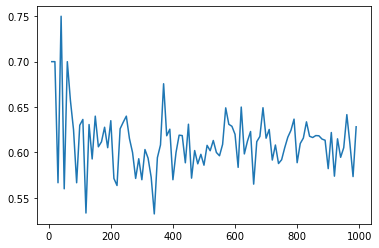

In [8]:
x = [i for i in range(10, 1000, 10)]
y = [ UAB_exp_coprime_prob(i, i) for i in range(10, 1000, 10)]
plt.plot(x, y)
plt.show()

In [9]:
# EXERCISE 3a: Compute Euler's totient function
#
# Function UAB_euler_phi.
# * Parameter n: Integer (>0)
# * Returns: phi(n), the number of number of positive integers less than n that are coprime to n
#
def UAB_euler_phi(n):
    #### IMPLEMENTATION GOES HERE ####
    result = 0
    if n > 0:
        for i in range(n):
            result += UAB_gcd_with_euclides(i, n) == 1
    ##################################
    return result

In [10]:
# EXERCISE 3b: Implement the square-and-multiply algorithm
#
# Function UAB_square_and_multiply.
# * Parameter a: Integer to check (>= 0)
# * Parameter n: Integer to check (>= 0)
# * Parameter p: Integer to check (>= 0)
# * Returns: a^n mod p
#

def UAB_square_and_multiply(a, n, p):
    #### IMPLEMENTATION GOES HERE ####
    result = None
    if isNatural(a) and isNatural(n) and isNatural(p):
        b   = bin(n)[2:]
        val = 1
        for i in b[:-1]:
            if i == "1": val *= a
            val **= 2
            if val > p:  val %= p
        if b[-1] == "1":
            val *= a
        result = val % p
    return result
    ##################################

In [11]:
# EXERCISE 3c: Compute 96^-1 mod 191 using the previous function

#### IMPLEMENTATION GOES HERE ####

UAB_square_and_multiply(96, (UAB_euler_phi(191)-1), 191)

##################################

2

In [12]:
####################################################################################
# TEST CASES EXERCICE 1a:
####################################################################################

def test_case_1a(name, num_tries, interval):
    
    acc_r = True
    ZZ = IntegerRing()
    for _ in range(num_tries):
         e = ZZ.random_element(interval)
         r = UAB_divisible_by_9(e)
         acc_r &= (r == (mod(e, 9) == 0))

    print("Test", name + ":", acc_r)

test_case_1a("1a.1", 200, 10^2)
test_case_1a("1a.2", 200, 10^4)
test_case_1a("1a.3", 200, 10^6)


####################################################################################
# TEST CASES EXERCICE 1b:
####################################################################################

def test_case_1b(name, num_tries, interval):
    
    acc_r = True
    ZZ = IntegerRing()
    for _ in range(num_tries):
         e = ZZ.random_element(interval)
         r = UAB_divisible_by_11(e)
         acc_r &= (r == (mod(e, 11) == 0))

    print("Test", name + ":", acc_r)

test_case_1b("1b.1", 200, 10^2)
test_case_1b("1b.2", 200, 10^4)
test_case_1b("1b.3", 200, 10^6)

####################################################################################
# TEST CASES EXERCICE 2a:
####################################################################################

def test_case_2a(name, num_tries, interval):
    
    acc_r = True
    ZZ = IntegerRing()
    for _ in range(num_tries):
         a = ZZ.random_element(interval)
         b = ZZ.random_element(interval)
         r = UAB_gcd_with_euclides(a, b)
         acc_r &= (r == gcd(a, b))

    print("Test", name + ":", acc_r)

test_case_2a("2a.1", 200, 10^2)
test_case_2a("2a.2", 200, 10^4)
test_case_2a("2a.3", 200, 10^6)

####################################################################################
# TEST CASES EXERCICE 3a:
####################################################################################

def test_case_3a(name, num_tries, interval):
    
    acc_r = True
    ZZ = IntegerRing()
    for _ in range(num_tries):
         a = ZZ.random_element(interval)
         r = UAB_euler_phi(a)
         acc_r &= (r == euler_phi(a))

    print("Test", name + ":", acc_r)

test_case_3a("3a.1", 200, 10^2)
test_case_3a("3a.2", 200, 10^3)
test_case_3a("3a.3", 200, 10^4)

####################################################################################
# TEST CASES EXERCICE 3b:
####################################################################################

def test_case_3b(name, num_tries, interval):
    
    acc_r = True
    ZZ = IntegerRing()
    for _ in range(num_tries):
         a = ZZ.random_element(interval)
         b = ZZ.random_element(interval)
         p = random_prime(interval)
         r = UAB_square_and_multiply(a, b, p)
         acc_r &= (r == power_mod(a, b, p))

    print("Test", name + ":", acc_r)

test_case_3b("3b.1", 200, 10^2)

Test 1a.1: True
Test 1a.2: True
Test 1a.3: True
Test 1b.1: True
Test 1b.2: True
Test 1b.3: True
Test 2a.1: True
Test 2a.2: True
Test 2a.3: True
Test 3a.1: True


Test 3a.2: True


Test 3a.3: True
Test 3b.1: True
